In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import gpflow



In [6]:
data=pd.read_excel('w.xlsx',sheet_name='Sheet2')
w=data.iloc[:,10:11]
acc=data.iloc[:,8:10]
top1=acc.iloc[:,0:1]
top5=acc.iloc[:,1:2]


In [7]:
X_train=w
y_train=top1
X=X_train
Y=y_train
model = gpflow.models.GPR(
    (X, Y),
    kernel=gpflow.kernels.SquaredExponential(),
)
opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables)
Xnew =np.arange(0.05, 1.6, 0.01).reshape(-1, 1)
Xplot = np.linspace(0.05, 1.55, 150)[:, None]
f_mean, f_var = model.predict_f(Xplot, full_cov=False)
y_mean, y_var = model.predict_y(Xplot)

f_lower = f_mean - 1.96 * np.sqrt(f_var)
f_upper = f_mean + 1.96 * np.sqrt(f_var)
y_lower = y_mean - 1.96 * np.sqrt(y_var)
y_upper = y_mean + 1.96 * np.sqrt(y_var)

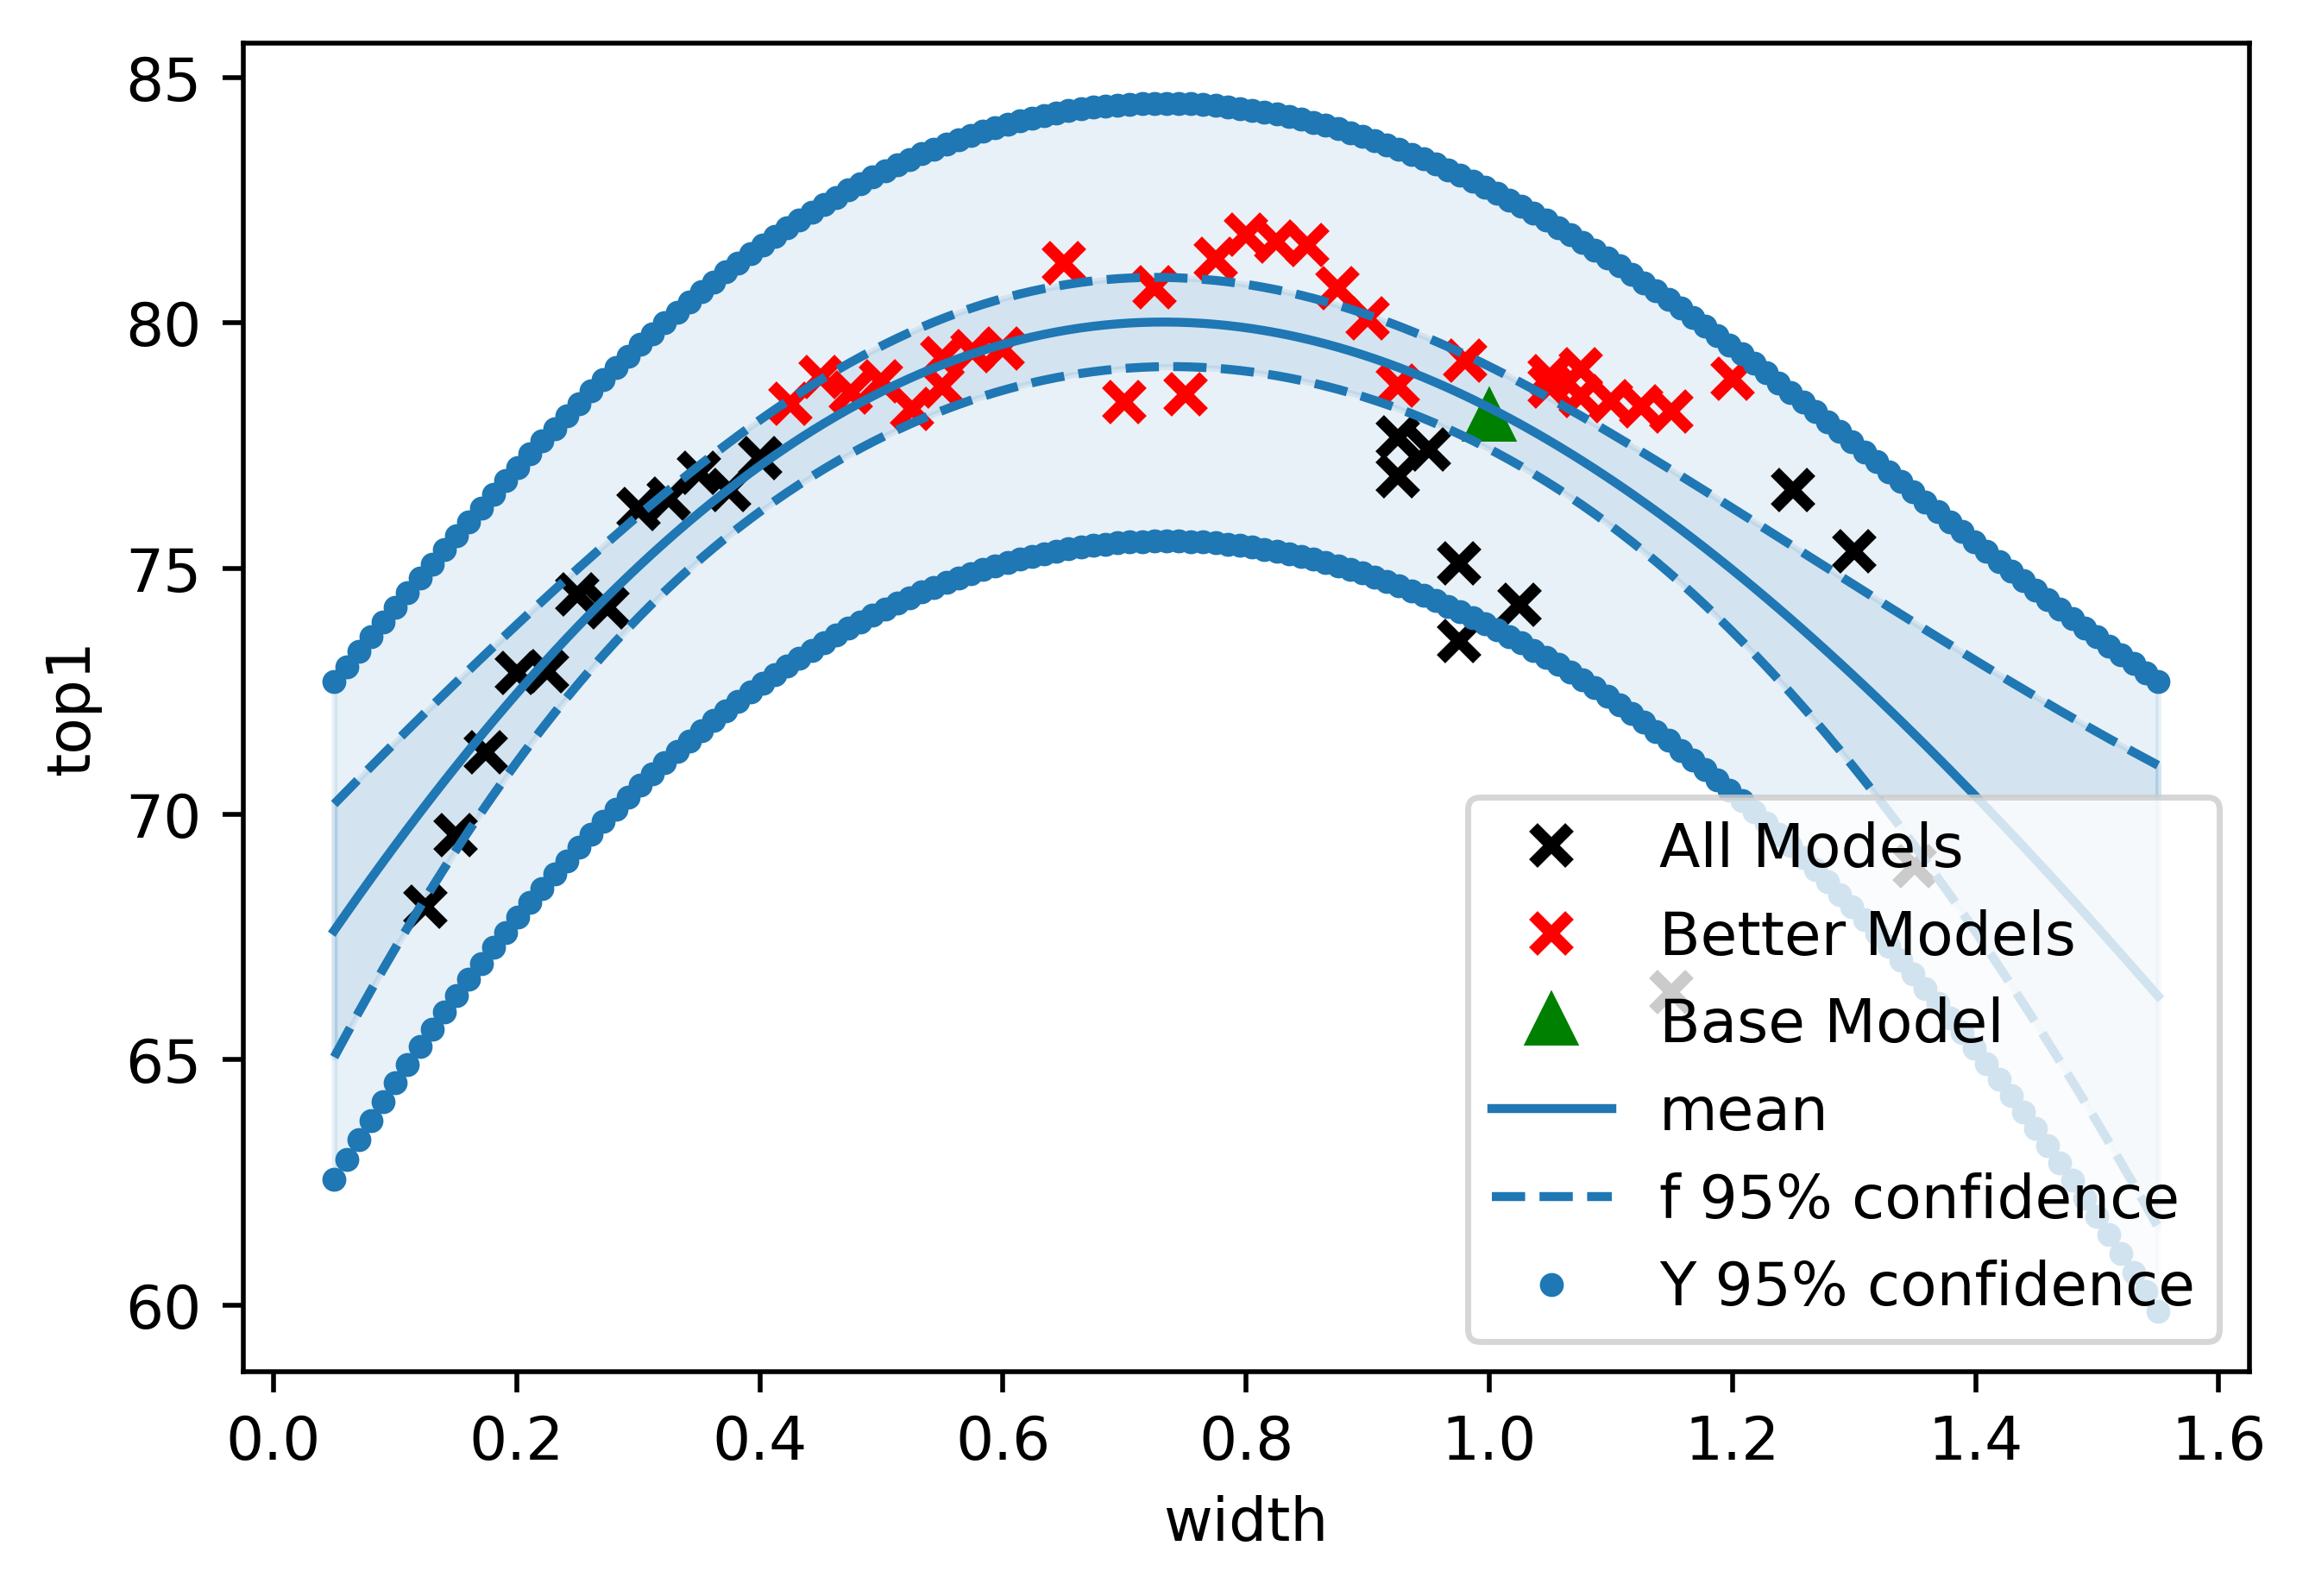

In [8]:
fig=plt.figure(figsize=(6,4),dpi=500)
font_dict = {'fontname': 'Arial', 'fontsize': 12}
top1=np.array(top1)
w=np.array(w)
base_index= [k for k in range(len(w)) if w[k] == 1]
base_top1=top1[base_index]
labels=['Base Model','All Models','Better Models']
added_labels=[]
for i in range(len(w)):
    if w[i]==1:
        plt.plot(w[i],top1[i],'g^',label=labels[0],mew=2)
        added_labels.append(labels[0])
    elif top1[i]<base_top1:
        if labels[1] not in added_labels:
            plt.plot(w[i],top1[i],'kx',label=labels[1],mew=2)
            added_labels.append(labels[1])
        else:
            plt.plot(w[i],top1[i],'kx',mew=2)
    elif top1[i]>=base_top1:
        if labels[2] not in added_labels:
            plt.plot(w[i],top1[i],'rx',label=labels[2],mew=2)
            added_labels.append(labels[2])
        else:
            plt.plot(w[i],top1[i],'rx',mew=2)

plt.plot(Xplot, f_mean, "-", color="C0", label="mean")
plt.plot(Xplot, f_lower, "--", color="C0", label="f 95% confidence")
plt.plot(Xplot, f_upper, "--", color="C0")
plt.fill_between(
    Xplot[:, 0], f_lower[:, 0], f_upper[:, 0], color="C0", alpha=0.1
)
plt.plot(Xplot, y_lower, ".", color="C0", label="Y 95% confidence")
plt.plot(Xplot, y_upper, ".", color="C0")
plt.fill_between(
    Xplot[:, 0], y_lower[:, 0], y_upper[:, 0], color="C0", alpha=0.1
)
plt.xlabel("width")
plt.ylabel("top1")
plt.legend(loc='lower right')

In [9]:
X_train=w
y_train=top5
X=X_train
Y=y_train
model_top5=gpflow.models.GPR(
    (X, Y),
    kernel=gpflow.kernels.SquaredExponential(),
)

opt_top5 = gpflow.optimizers.Scipy()
opt_top5.minimize(model_top5.training_loss, model_top5.trainable_variables)
Xnew_top5 =np.arange(0.3, 2.75, 0.01).reshape(-1, 1)
Xplot_top5 = np.linspace(0.05, 1.55, 150)[:, None]
f_mean_top5, f_var_top5 = model_top5.predict_f(Xplot_top5, full_cov=False)
y_mean_top5, y_var_top5 = model_top5.predict_y(Xplot_top5)

f_lower_top5 = f_mean_top5 - 1.96 * np.sqrt(f_var_top5)
f_upper_top5 = f_mean_top5 + 1.96 * np.sqrt(f_var_top5)
y_lower_top5 = y_mean_top5 - 1.96 * np.sqrt(y_var_top5)
y_upper_top5 = y_mean_top5 + 1.96 * np.sqrt(y_var_top5)

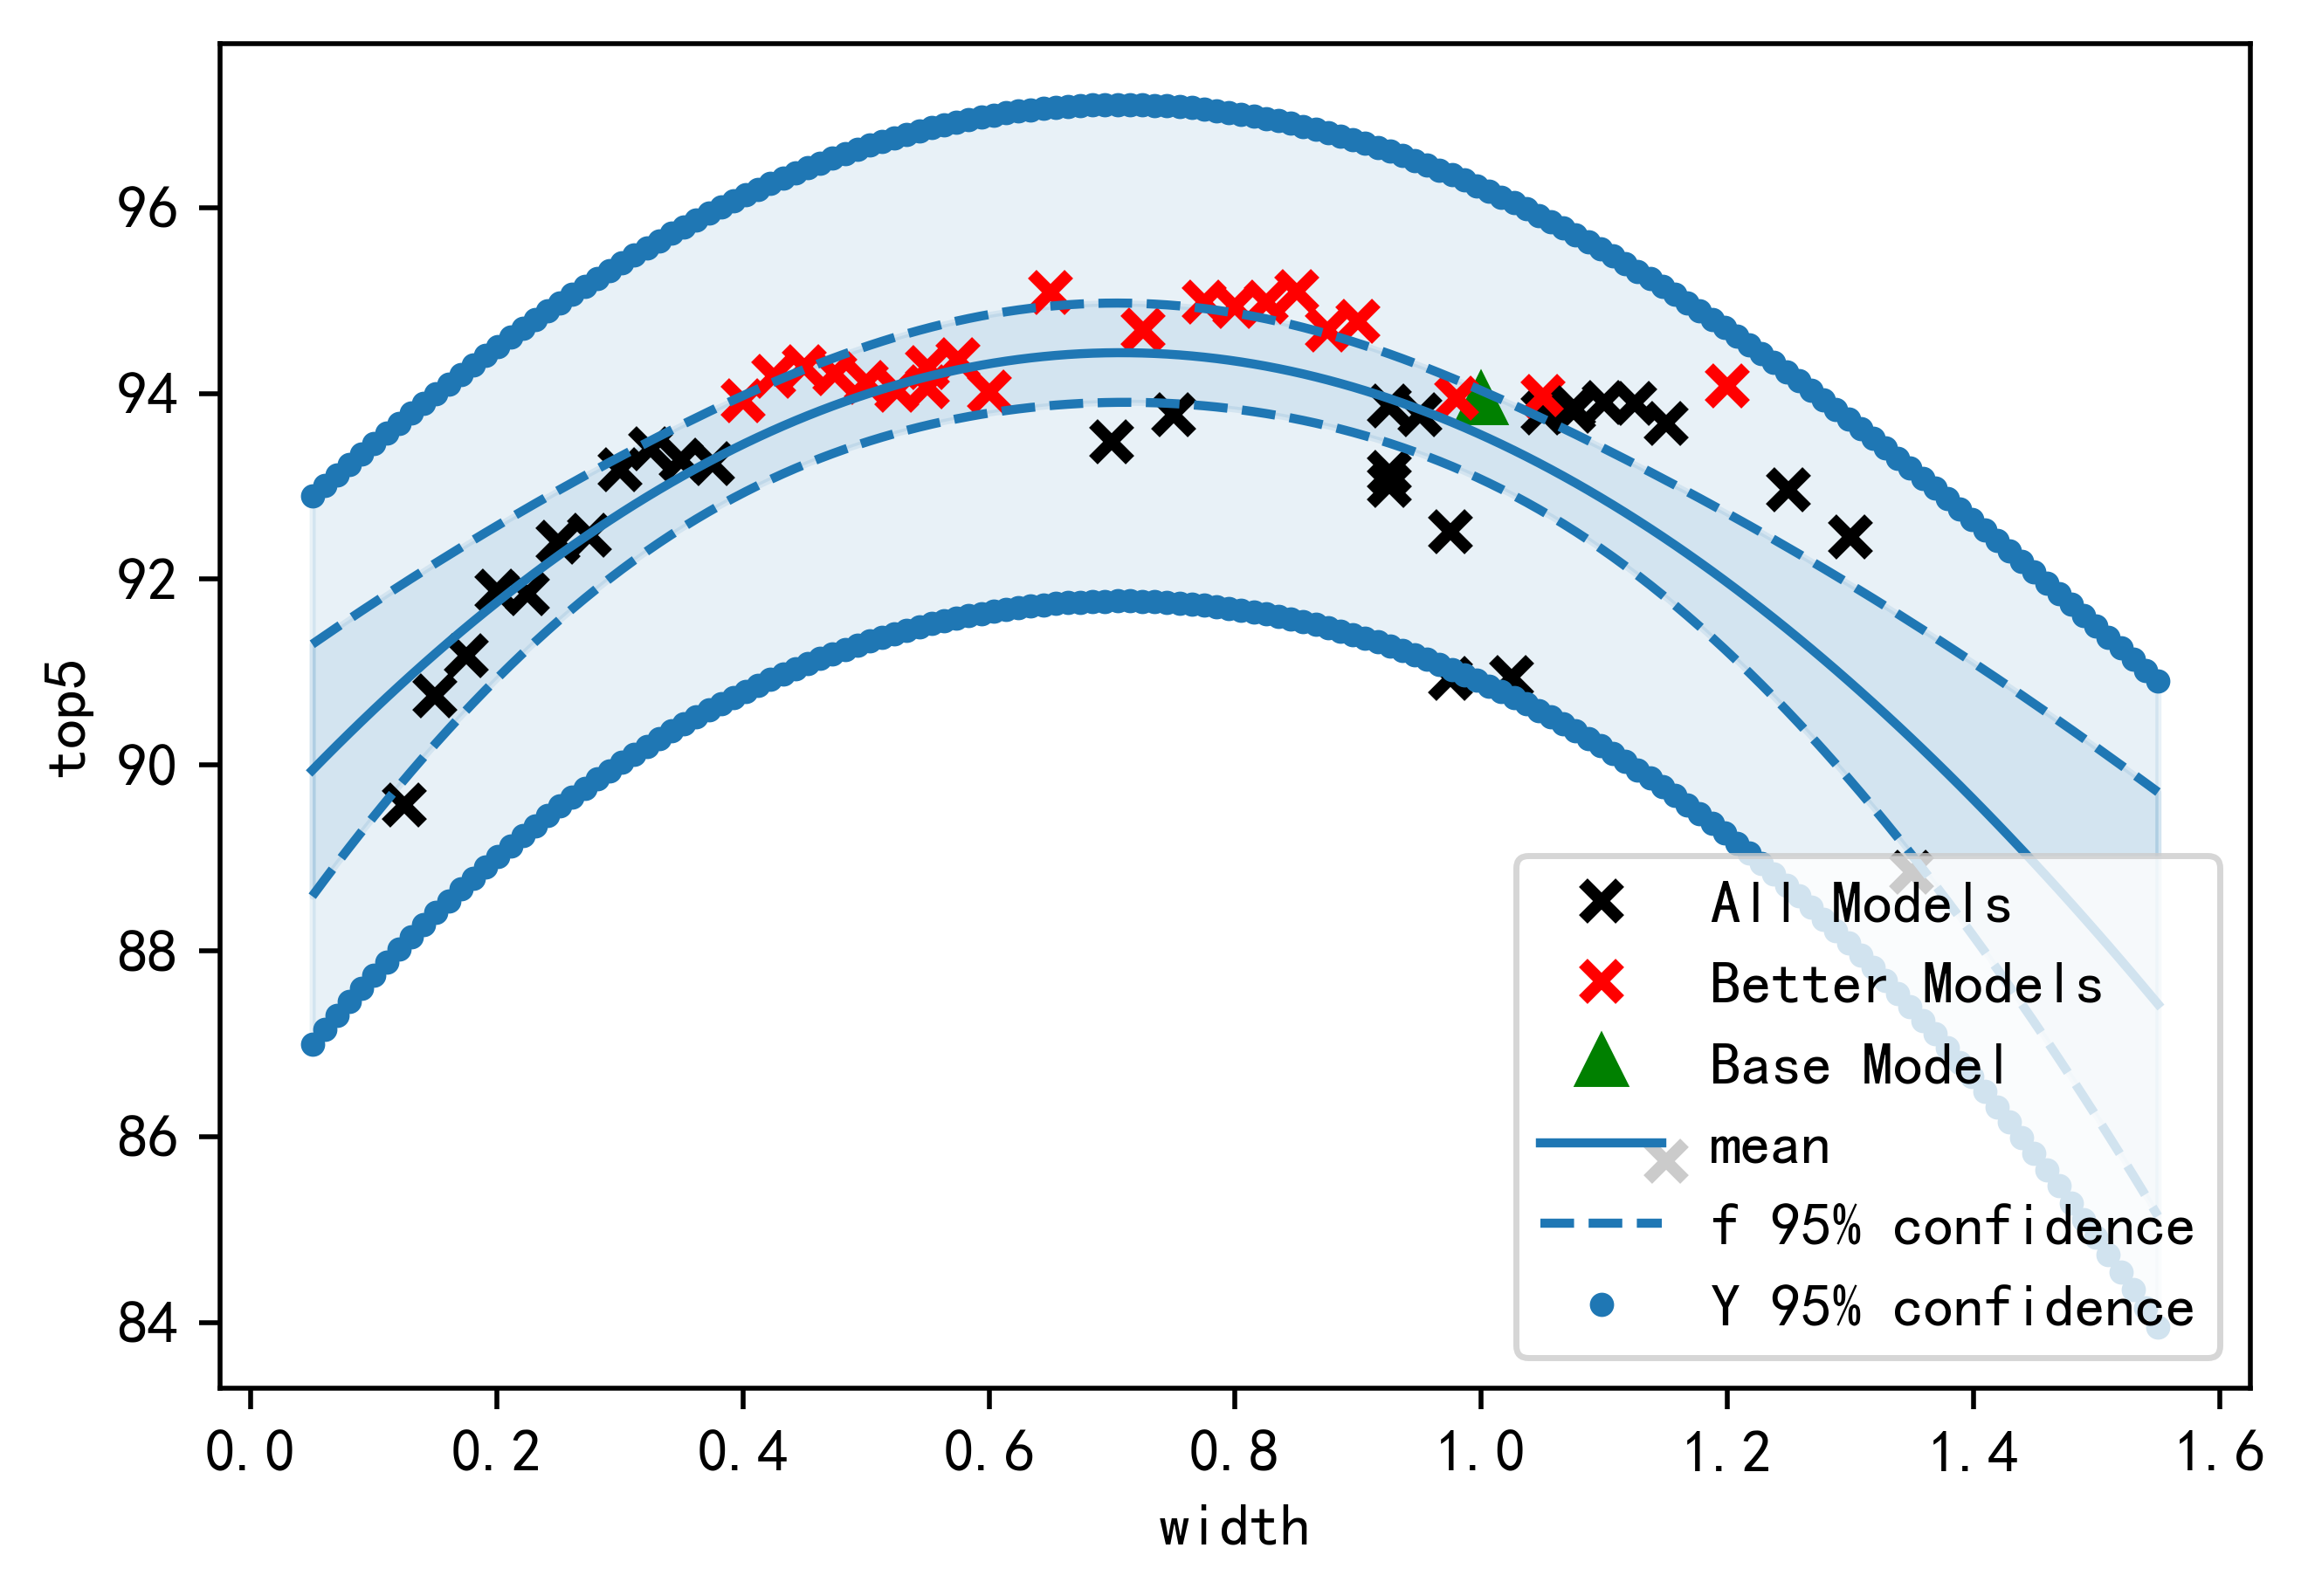

In [10]:
fig2=plt.figure(figsize=(6,4),dpi=500)
font_dict = {'fontname': 'Arial', 'fontsize': 12}
top5=np.array(top5)
w=np.array(w)
base_index= [k for k in range(len(w)) if w[k] == 1]
base_top5=top5[base_index]
labels=['Base Model','All Models','Better Models']
added_labels=[]
for i in range(len(w)):
    if w[i]==1:
        plt.plot(r[i],top5[i],'g^',label=labels[0],mew=2)
        added_labels.append(labels[0])
    elif top5[i]<base_top5:
        if labels[1] not in added_labels:
            plt.plot(w[i],top5[i],'kx',label=labels[1],mew=2)
            added_labels.append(labels[1])
        else:
            plt.plot(w[i],top5[i],'kx',mew=2)
    elif top5[i]>=base_top5:
        if labels[2] not in added_labels:
            plt.plot(w[i],top5[i],'rx',label=labels[2],mew=2)
            added_labels.append(labels[2])
        else:
            plt.plot(w[i],top5[i],'rx',mew=2)

plt.plot(Xplot_top5, f_mean_top5, "-", color="C0", label="mean")
plt.plot(Xplot_top5, f_lower_top5, "--", color="C0", label="f 95% confidence")
plt.plot(Xplot_top5, f_upper_top5, "--", color="C0")
plt.fill_between(
    Xplot_top5[:, 0], f_lower_top5[:, 0], f_upper_top5[:, 0], color="C0", alpha=0.1
)
plt.plot(Xplot_top5, y_lower_top5, ".", color="C0", label="Y 95% confidence")
plt.plot(Xplot_top5, y_upper_top5, ".", color="C0")
plt.fill_between(
    Xplot_top5[:, 0], y_lower_top5[:, 0], y_upper_top5[:, 0], color="C0", alpha=0.1
)
plt.xlabel("width")
plt.ylabel("top5")
plt.legend(loc='lower right')